# Exercise Sheet 04: Bayesian and Deep Knowledge Tracing

**Introduction to Data Mining WS24/25**  
**Bielefeld University**  
**Alina Deriyeva, Adia Khalid, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2024-12-02**  
**Exercise Sheet Submission Deadline: Friday, 2024-12-13, noon (i.e. 12:00), via moodle**

**NOTE** The use of language models/AI tools is permitted under three conditions
1. transparency: you tell us that you used them
2. accountability: you take full responsibility for the submission, can explain and defend it
3. privacy: you do not transmit any private information to any external tool

We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool for research purposes.

### Preamble: Data set

Consider the data set in `kt_data.csv`. This data set contains the exercise results for a population of fictional students and two skills.

Each row corresponds to one attempt of one student on an exercise. The first column indicates the student index $i$, the second column the time $t$, the third column the exercise index $j$, the fourth whether this exercise needs the first skill (0 if no, 1 if yes), the fifth column whether this exercise needs the second skill (0 if no, 1 if yes), and the sixth column the outcome of the attempt: 0 for a failure, 1 for a success.

The following code loads the raw data and prints it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('kt_data.csv', skiprows = 1, delimiter = '\t', dtype=int)
print(X)

[[ 0  0  1  1  0  0]
 [ 0  1  1  1  0  0]
 [ 0  2  1  1  0  0]
 [ 0  3  2  0  1  0]
 [ 0  4  1  1  0  0]
 [ 0  5  4  1  1  1]
 [ 0  6  3  0  1  0]
 [ 0  7  4  1  1  1]
 [ 0  8  1  1  0  1]
 [ 0  9  4  1  1  1]
 [ 0 10  2  0  1  1]
 [ 1  0  4  1  1  1]
 [ 1  1  2  0  1  0]
 [ 1  2  3  0  1  1]
 [ 1  3  2  0  1  1]
 [ 1  4  2  0  1  1]
 [ 1  5  4  1  1  1]
 [ 1  6  3  0  1  1]
 [ 1  7  2  0  1  1]
 [ 1  8  0  1  0  1]
 [ 2  0  5  1  1  0]
 [ 2  1  2  0  1  0]
 [ 2  2  3  0  1  1]
 [ 2  3  0  1  0  1]
 [ 2  4  3  0  1  0]
 [ 2  5  4  1  1  1]
 [ 2  6  4  1  1  1]
 [ 2  7  0  1  0  1]
 [ 2  8  0  1  0  1]
 [ 2  9  1  1  0  1]
 [ 3  0  1  1  0  0]
 [ 3  1  3  0  1  0]
 [ 3  2  5  1  1  0]
 [ 3  3  3  0  1  0]
 [ 3  4  5  1  1  1]
 [ 3  5  3  0  1  0]
 [ 3  6  3  0  1  0]
 [ 3  7  3  0  1  1]
 [ 3  8  4  1  1  1]
 [ 3  9  0  1  0  1]
 [ 3 10  1  1  0  1]
 [ 4  0  4  1  1  0]
 [ 4  1  2  0  1  0]
 [ 4  2  0  1  0  0]
 [ 4  3  4  1  1  0]
 [ 4  4  0  1  0  1]
 [ 4  5  2  0  1  1]
 [ 4  6  0  1

### Task 04.01

Just by considering the data set itself, what might be problems when applying Bayesian knowledge tracing to this data?

**ANSWER:**

Bayesian knowledge tracing is limited to one skill per task (in general). Looking at the dataset, we can see that some tasks require multiple skills in their assignment, which could cause problems when applying Bayesian knowledge tracing to it.

### Task 04.02

Let's assume that some local government wants to use a deep knowledge tracing model on this data to estimate the skill development of students to make funding decisions. In particular, school funding should be allocated to the schools that achieve a fastest skill development of students according to the model (conversely, funding should be reduced for schools that achieve less fast skill development).

List at least two problems with this kind of application of deep knowledge tracing and explain them.

**ANSWER:**

Ethically speaking, we are removing funding from schools where there is already a deficit in learning, further punishing bad students by taking away the support they might need. Furthermore, more funding in turn leads to, in general, better learning opportunities later, which would result in more funding. Basically, it's a vicious feedback loop with tons of biases.

The model is only trained on a small sample of students (which took the tests), and only on a small sample of skills. We do not know if the development in skill is directly associated with the learning speed. This is a massive oversimplification of how well a school is doing in educating their pupils and might have adverse results.

Furthermore, its questionable whether giving funding to schools already doing well (by whatever metric) and removing said funding from schools which might need help, is ethical or productive.


## Bayesian Knowledge Tracing

A Bayesian Knowledge Tracing Model is a two-state Hidden Markov Model (either a student mastered a skill at time $t$ or they did not), where we denote the random variable for the state of student $i$ at time $t$ as $Z_{i, t}$ and the random variable for the result (pass/fail) of student $i$ at time $t$ as $X_{i, t}$. The parameters of the model are:

\begin{align*}
p_{Z_{i, 1}}(1) &= p_\mathrm{start},\\
p_{X_{i, t}|Z_{i, t}}(0|1) &= p_\mathrm{slip}, \\
p_{X_{i, t}|Z_{i, t}}(1|0) &= p_\mathrm{guess}, \\
p_{Z_{i, t}|Z_{i, t-1}}(1|1) &= 1, &\text{ and} \\
p_{Z_{i, t}|Z_{i, t-1}}(1|0) &= p_\mathrm{trans}
\end{align*}

Given a series of past results $x_{i, 1}, \ldots, x_{i, t}$ for student $i$, we denote:

\begin{align}
p_{i, t+1} &= p_{Z_{i, t+1}|X_{i, t}, \ldots, X_{i, 1}}(1|x_{i, t}, \ldots, x_{i, 1}) & \text{ and} \\
q_{i, t}   &= p_{Z_{i, t}|X_{i, t}, \ldots, X_{i, 1}}(1|x_{i, t}, \ldots, x_{i, 1})
\end{align}

With these two short-hand notations, we obtain the following equations (refer to the lecture slides for the derivation):
\begin{align}
p_{i, t+1} &= q_{i, t} + p_\mathrm{trans} \cdot (1 - q_{i, t}) \\
q_{i, t}   &=
\begin{cases}
\frac{(1-p_\mathrm{slip}) \cdot p_{i, t}}{(1-p_\mathrm{slip}) \cdot p_{i, t} + p_\mathrm{guess} \cdot (1 - p_{i, t})} & \text{if } x_{i, t} = 1 \\
\frac{p_\mathrm{slip} \cdot p_{i, t}}{p_\mathrm{slip} \cdot p_{i, t} + (1-p_\mathrm{guess}) \cdot (1 - p_{i, t})} & \text{if } x_{i, t} = 0
\end{cases}
\end{align}

### Task 04.03

Let's assume we have a series of results $x_{i, 1}, \ldots, x_{i, t}$ for student $i$ with the last entry being $x_{i, t} = 1$.

Further, let's denote the joint probability $p_{Z_{i, t}, X_{i, t}, \ldots, X_{i, 1}}(z, x_{i, t}, \ldots, x_{i, 1})$ as $\alpha_{i, t}(z)$.

Show, that the following equality holds:
\begin{equation*}
\alpha_{i, t}(1) = (1 - p_\mathrm{slip}) \cdot \Big[p_\mathrm{trans} \cdot \alpha_{i, t-1}(0) + \alpha_{i, t-1}(1)\Big]
\end{equation*}

**HINT**: Recall that, in a BKT model, the latent space $Z_{i, t}$ of student $i$ at time $t$ is conditionally independent of all past observations given $Z_{i, t-1}$ and $X_{i, t}$ is conditionally independent from past observations given $Z_{i, t}$.

Other than these bits of information, you 'only' need to smartly apply the definition of conditional probabilities and the law of total probability for this task. 

**ANSWER:** PLEASE PROVIDE LATEX CODE OR AN IMAGE OF YOUR DERIVATION HERE

\begin{align*}
\alpha_{i,t}(1) &= p_{Z_{i, t}, X_{i, t}, \ldots, X_{i, 1}}(1, x_{i, t}, \ldots, x_{i, 1})\\
\text{(Conditional Probability)} \quad &= p_{X_{i, t} \vert Z_{i, t} ,X_{i,t-1} \ldots, X_{i, 1}}(x_{i, t} | 1, x_{i,t-1} \ldots, x_{i, 1}) \cdot p_{Z_{i, t}, X_{i, t-1}, \ldots, X_{i, 1}}(1, x_{i, t-1}, \ldots, x_{i, 1})\\
&= p_{X_{i, t} \vert Z_{i, t}}(1 | 1) \cdot p_{Z_{i, t}, X_{i, t-1}, \ldots, X_{i, 1}}(1, x_{i, t-1}, \ldots, x_{i, 1})\\
&= (1- p_{slip}) \cdot p_{Z_{i, t}, X_{i, t-1}, \ldots, X_{i, 1}}(1, x_{i, t-1}, \ldots, x_{i, 1})\\
&= (1- p_{slip}) \cdot \sum_{z \in \{0,1\}} p_{Z_{i, t} \vert X_{i, t-1}, \ldots, X_{i, 1}, Z_{i,t-1}}(1 | x_{i, t-1}, \ldots, x_{i, 1} , z) \cdot p_{Z_{i, t-1}, X_{i, t-1}, \ldots, X_{i, 1}}(z, x_{i, t-1}, \ldots, x_{i, 1})\\
&= (1- p_{slip}) \cdot \sum_{z \in \{0,1\}} p_{Z_{i, t} \vert X_{i, t-1}, \ldots, X_{i, 1}, Z_{i,t-1}}(1 | x_{i, t-1}, \ldots, x_{i, 1} , z) \cdot \alpha_{i,t-1}(z)\\
&= (1- p_{slip}) \cdot \sum_{z \in \{0,1\}} p_{Z_{i, t} \vert Z_{i,t-1}}(1 | z) \cdot \alpha_{i,t-1}(z)\\
&= (1- p_{slip}) \cdot \big( p_{Z_{i, t} \vert Z_{i,t-1}}(1 | 0) \cdot \alpha_{i,t-1}(0) + p_{Z_{i, t} \vert Z_{i,t-1}}(1 | 1) \cdot \alpha_{i,t-1}(1) \big)\\
&= (1- p_{slip}) \cdot \big( p_{trans} \cdot \alpha_{i,t-1}(0) + \alpha_{i,t-1}(1) \big)\\
\end{align*}

### Task 04.04

Given the equations above, write a Python function that takes an array $x_{i, 1}, \ldots, x_{i, t}$ of student results (pass/fail) for one skill and the parameters $p_\mathrm{start}$, $p_\mathrm{slip}$, $p_\mathrm{guess}$, and $p_\mathrm{trans}$ as input and returns an array of probability $p_{i, 1+1}, \ldots, p_{i, t+1}$ as output.

In [1]:
def bkt(x, pstart, pslip, pguess, ptrans):
    ps = []
    # initialize p
    p  = pstart
    for t in range(len(x)):
        x_t = x[t]
        
        if x_t == 1:
            q = ((1-pslip)*p)/((1-pslip)*p + pguess * (1-p))
        else:
            q = (pslip*p)/(pslip*p + (1-pguess) * (1-p))
            
        p = q + ptrans * (1-q)

        # append it to the output
        ps.append(p)
        
    return np.array(ps)

### Task 04.05

For this task, use the parameter settings $p_\mathrm{start} = 0.1$, $p_\mathrm{slip} = 0.1$, $p_\mathrm{guess} = 0.2$, and $p_\mathrm{trans} = 0.3$.

For each student and each skill, provide a plot with time step $t$ on the x axis and $p_{i, t+1}$ on the y axis, using your function from Task 04.04.

In [97]:
def task5(_pstart, _pslip, _pguess, _ptrans, limit=None, title=""):
    for student in set(X[:, 0]):
        if limit is not None:
            if student > limit:
                continue
            
            
        x_student = X[X[:, 0] == student]
        maximum_time = max(x_student[:, 1])
    
        for skill in range(0,2):
            x_skill = x_student[x_student[:, skill+3] == 1]
            
            success = x_skill[:, 5]
            
            x_time = x_skill[:, 1]
            y_success = bkt(success, _pstart, _pslip, _pguess, _ptrans)
                    
            # First time the skill is used.
            first_occurence = x_time[0]
            #print(x_time)
            #print(y_success)
            
            # We fill in all timesteps where we did not see a skill usage with the previous p value.
            for theoretical_time in range(maximum_time+1):
                if not theoretical_time in x_time:
                    new_value = _pstart if theoretical_time < first_occurence else y_success[theoretical_time-1]
                    y_success = np.insert(y_success, theoretical_time, new_value)
            
            plt.plot(range(maximum_time+1), y_success, label=f"Skill {skill}")
            plt.scatter(x_time, success, s=1/(skill*3+1) * 100, label=f"Test Success of Skill {skill}")
            
        print(_pstart, _pslip, _pguess, _ptrans)    
            
        plt.legend(loc='best')
        plt.xlabel('Time')
        plt.ylabel('Probability to master Skill')
        if title:
            plt.title(title)
        else:
            plt.title(f"Student {student}")
        plt.show()
        

0.1 0.1 0.2 0.3


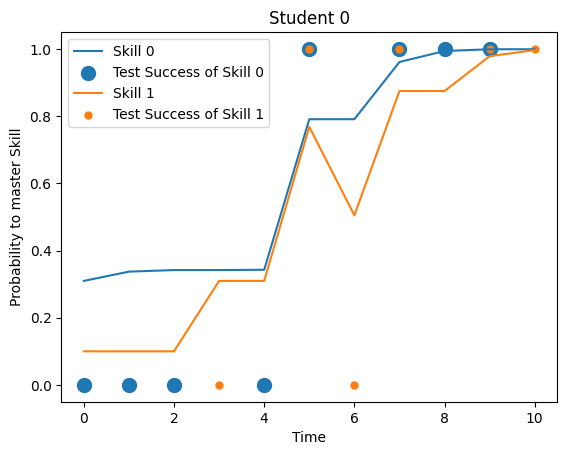

0.1 0.1 0.2 0.3


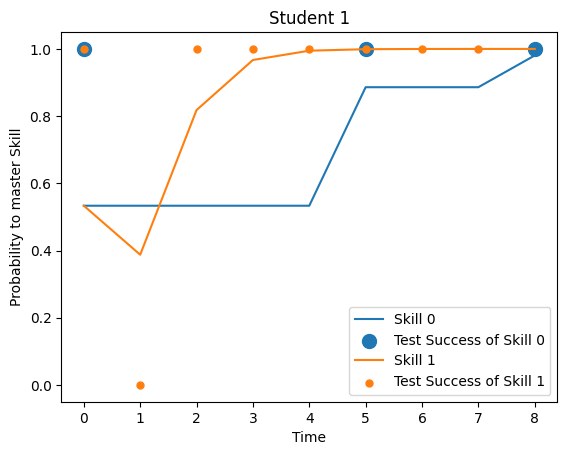

0.1 0.1 0.2 0.3


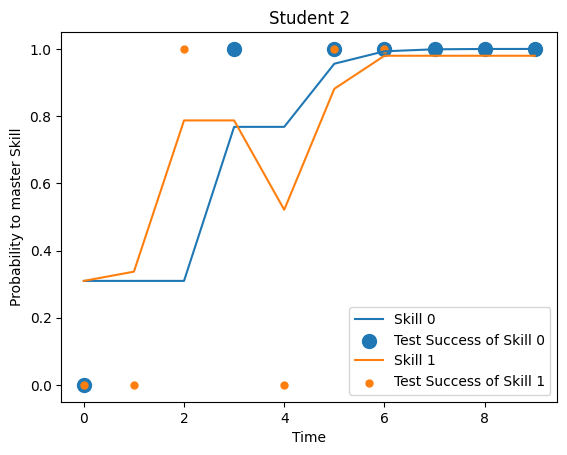

0.1 0.1 0.2 0.3


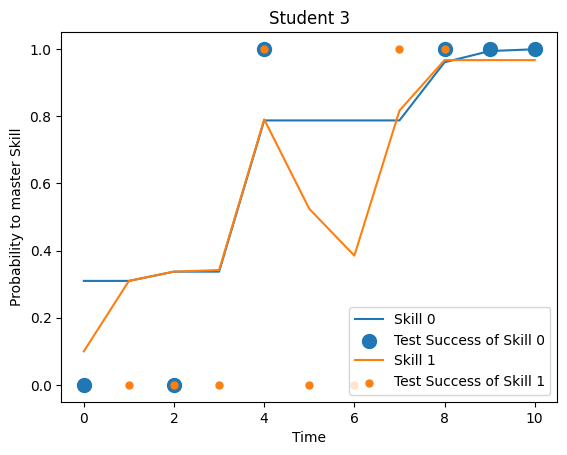

0.1 0.1 0.2 0.3


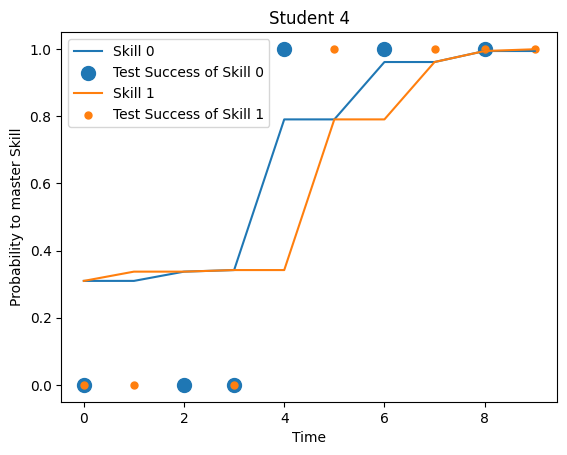

0.1 0.1 0.2 0.3


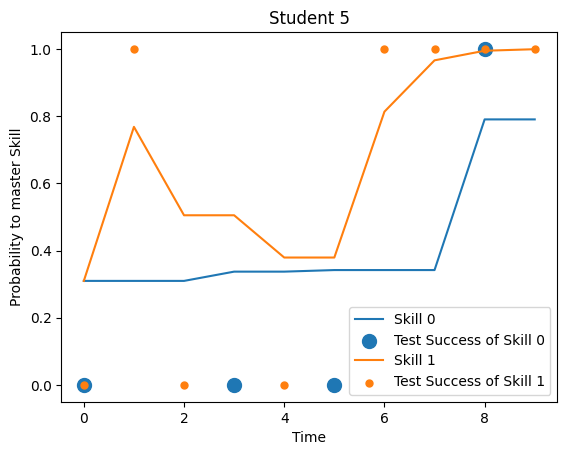

0.1 0.1 0.2 0.3


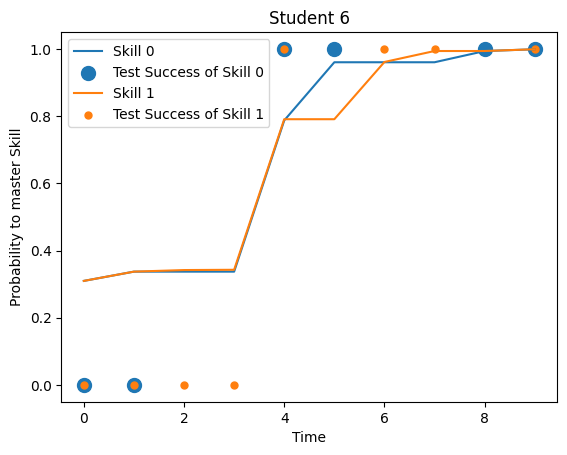

0.1 0.1 0.2 0.3


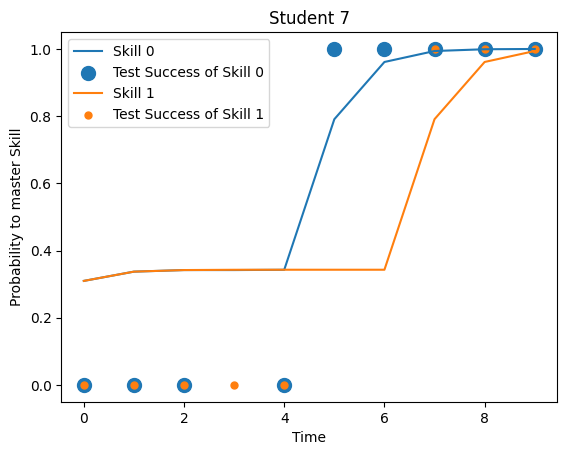

In [98]:
pstart = 0.1
pslip  = 0.1
pguess = 0.2
ptrans = 0.3

task5(pstart, pslip, pguess, ptrans)

### Task 04.06

For each of the parameters, test what happens if you increase the parameter by 0.1. Report the effect on $p_{i, t+1}$.

0.1 0.1 0.2 0.3


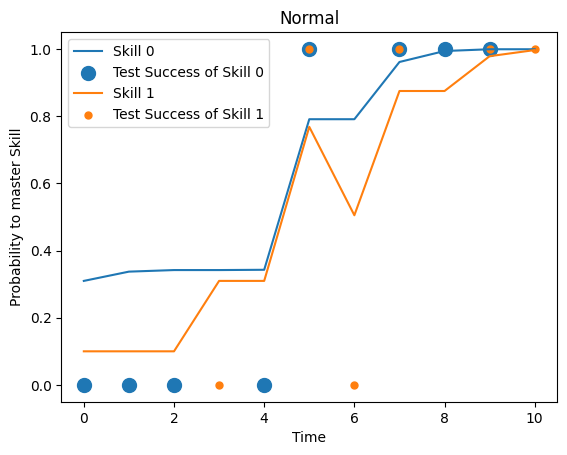

0.2 0.1 0.2 0.3


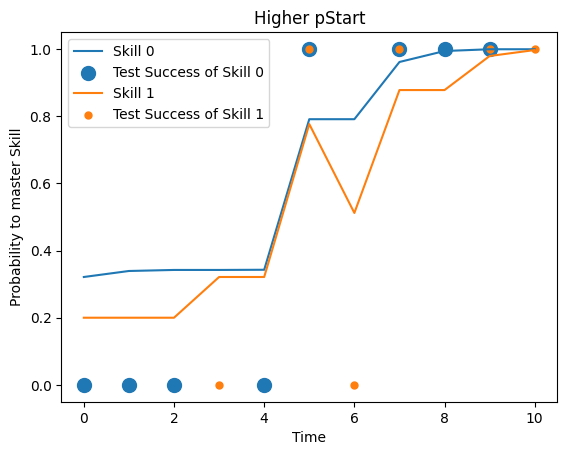

0.1 0.2 0.2 0.3


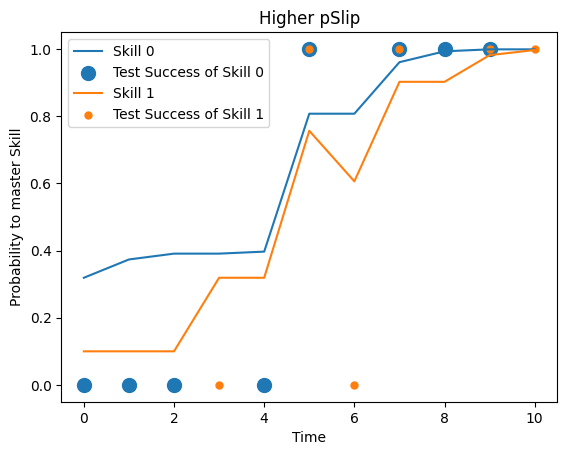

0.1 0.1 0.30000000000000004 0.3


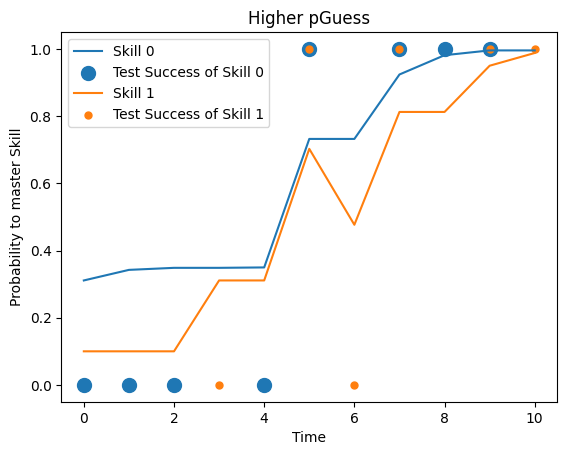

0.1 0.1 0.2 0.4


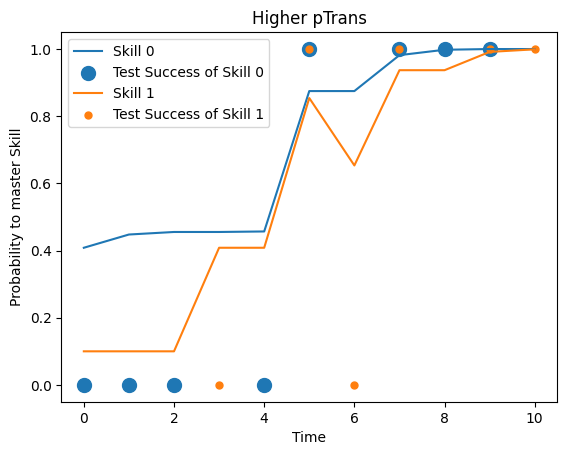

In [99]:
task5(pstart, pslip, pguess, ptrans, limit=0, title="Normal")
task5(pstart+0.1, pslip, pguess, ptrans, limit=0, title="Higher pStart")
task5(pstart, pslip+0.1, pguess, ptrans, limit=0, title="Higher pSlip")
task5(pstart, pslip, pguess+0.1, ptrans, limit=0, title="Higher pGuess")
task5(pstart, pslip, pguess, ptrans+0.1, limit=0, title="Higher pTrans")

**ANSWER FOR $p_\mathrm{start}$:** 

Increasing this value seems to only shift the probability to understand a skill up until we can first measure a test where this appears. Afterwards, the results look very similar to our base case.

**ANSWER FOR $p_\mathrm{slip}$:** 
Increasing this value seems to decrease the punishment upon failing a test. We see less sharp dips in probability upon a failed test, since it is way more likely to still fail a test even when having understood a skill.

**ANSWER FOR $p_\mathrm{guess}$:** 

Increasing this values seems to decrease the reward received upon a correct test result. It is way more likely to simply guess a correct solution, so we can be less sure a student has understood a skill when a test was successful.

**ANSWER FOR $p_\mathrm{trans}$:**
Looking at the formula, this value is the chance to go from not having understood the topic, to having understood the topic in the next timestep. As such we can see that the model generally assumes that a student learns a skill faster than before, and we generally see a convergence to 100% way more quickly.

## Deep Knowledge Tracing

### Task 04.07

Generate a list `Xs_dkt` of matrices, one per student.

The matrix `Xi` for student $i$ should start with one row of zeros and each subsequent row `Xi[t+1, :]` of the matrix should correspond to one attempt of student $i$ at some exercise at time $t$. There should be two columns per exercise (twelve columns overall), where entry `Xi[t+1, j]` should be 1 if the attempt $t$ was successful and `Xi[t+1, 6 + j]` should be 1 if the attempt was a failure. The last attempt of the student should not be represented in `Xi`.

For example, if student $i$ has three attempts, one success on exercise 0, one failure on exercise 2, and a success on exercise 2, then the matrix `Xi` should be as follows:

```
Xi = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # zero row for the first attempt
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # first attempt (success at first exercise)
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]  # second attempt (failure at third exercise)
]
```

Generate a list `Ys_dkt` of matrices, one per student, which contain the exercise indices and the results results of the student.

For example, if student $i$ has three attempts, one success on exercise 0, one failure on exercise 2, and a success on exercise 2, then `Yi` should be as follows:

```
Yi = [
    [0, 1],
    [2, 0],
    [2, 1]
]
```

In [4]:
import torch

### Task 04.08

The following deep knowledge tracing model takes a student matrix `Xi` from Task 04.13 as input and produces a matrix `Logits` with as many rows and 6 columns, one per exercise. The entry `Logits[t, j]` is supposed to be the logit probability of student $i$ succeeding at exercise $j$ in time step $t$.

To train this model, we want to use the following scheme:

Repeat for num_epochs:
1. Pick a random student $i$.
2. Get the matrix `Xi` and the array `Yi` from Task 04.11.
3. Compute the output `Logits` for input `Xi` via the `forward` method of the DKT modul.
4. For each time step $t$, repeat:
    1. Retrieve the exercise index `j = Yi[t, 0]` and the actual result `x = Yi[t, 1]`.
    2. Use the function `torch.nn.functional.binary_crossentropy_with_logits` to compute the loss between the predicted logit probability `Logits[t, j]` and the actual outcome `x`.

Implement this scheme in the `fit` function of the model below.

In [5]:
import torch
import random

class DKT(torch.nn.Module):
    """The initialization function of a pytorch module. Here, we should set all hyperparameters
    of the model, such as the regularization strength.

    Parameters
    ----------
    num_exercises: int
        The number of exercises in the data set.
    num_neurons: int (default = 32)
        The number of neurons used in the GRU.
    C: float (default = 1000)
        The inverse of the L2 regularization strength.
    num_epochs: int (default = 1000)
        How many times we iterate over the data set.
    learning_rate: float (default = 1E-2)

    """
    def __init__(self, num_exercises, num_neurons = 32, C = 1000., num_epochs = 1000, learning_rate = 1E-2):
        super(DKT, self).__init__()
        self.num_exercises_ = num_exercises
        self.num_neurons_   = num_neurons
        self.C_             = C
        self.num_epochs_    = num_epochs
        self.learning_rate_ = learning_rate
        # initialize the network layers
        self.gru_           = torch.nn.GRU(self.num_exercises_*2, self.num_neurons_)
        self.out_           = torch.nn.Linear(self.num_neurons_, self.num_exercises_)


    """Predicts logit probabilities of success for the given input data
    
    Parameters
    ----------
    X: torch.tensor
        A feature matrix for one student, where each row represents one attempted exercise.
        The first self.num_exercises_ columns should indicate whether a student achieved
        a success at exercise j in this timestep, the latter self.num_exercises_ columns
        should indicate failures.

    Returns
    -------
    Logits: torch.tensor
        A matrix where the entry Logits[t, j] indicates the predicted logit success probability
        for the student for exercise j at time t.

    """
    def forward(self, X):
        H, _ = self.gru_(X)
        return self.out_(H)

    """Scores the accuracy of this model.
    
    Parameters
    ----------
    X: list
        A list of feature matrices, one per student.
    Y: list
        A list of target matrices, one per student.

    Returns
    -------
    acc: float
        An accuracy value.
    
    """
    def score(self, X, Y):
        num_attempts  = 0
        num_successes = 0
        for i in range(len(X)):
            Logits = self.forward(X[i])
            for t in range(Y[i].shape[0]):
                num_attempts += 1
                j = int(Y[i][t, 0])
                if Y[i][t, 1] > 0.5 and Logits[t, j] > 0:
                    num_successes += 1
                elif Y[i][t, 1] < 0.5 and Logits[t, j] <= 0:
                    num_successes += 1
        return num_successes / num_attempts

    """Fits this model to the given data matrix.

    Parameters
    ----------
    X: list
        A list of feature matrices, one per student.
    Y: list
        A list of target matrices, one per student.

    """
    def fit(self, X, Y):
        # initialize optimizer
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate_, weight_decay = 1. / self.C_)
        # start training
        for epoch in range(self.num_epochs_):
            # re-set the current gradient to zero
            optimizer.zero_grad()
            # get a random student index
            i  = random.randrange(len(X))
            Xi = X[i]
            Yi = Y[i]
            # compute the Logits
            Logits = self.forward(Xi)
            # compute the loss
            # TODO IMPLEMENT THIS LOSS
            loss = None
            # report the loss
            if (epoch+1) % 100 == 0:
                print('epoch %d: loss %g' % (epoch+1, loss.item()))
            # compute the gradient
            loss.backward()
            # apply the optimizer
            optimizer.step()
        
        return self

### Task 04.09

Train the model on the data using your `fit` function from Task 04.08 and report the accuracy using the `score` function.

### Task 04.10

For each student, plot how the DKT predicted success probability develops over time.

Try to interpret these curves? Do they fit your intuition?

**ANSWER:** 